# CodeClause Internship
#### Project ID - #CC69848
#### Project Title - Movie Genre Prediction
#### Internship Domain - Data Science Intern
#### Project Level - Intermediate Level
#### Aim -
> Predict the genre of a movie based on its plot summary and other features.
#### Description -
> Use natural language processing (NLP) techniques for text classification on a movie dataset.
#### Technologies -
> Python, NLTK or SpaCy, Scikit-learn.

## 1. Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

## 2. Reading and Understanding the Dataset

In [2]:
# https://www.kaggle.com/datasets/jrobischon/wikipedia-movie-plots/data

In [3]:
df1 = pd.read_csv('wiki_movie_plots_deduped.csv')

In [4]:
df1.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [5]:
# Check for missing values
print(df1.isnull().sum())


Release Year           0
Title                  0
Origin/Ethnicity       0
Director               0
Cast                1422
Genre                  0
Wiki Page              0
Plot                   0
dtype: int64


In [6]:

# Drop rows with missing values in important columns
df1.dropna(subset=['Plot', 'Genre'], inplace=True)


In [7]:

# Inspect the data types
print(df1.dtypes)

Release Year         int64
Title               object
Origin/Ethnicity    object
Director            object
Cast                object
Genre               object
Wiki Page           object
Plot                object
dtype: object


In [8]:
df1.columns

Index(['Release Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast',
       'Genre', 'Wiki Page', 'Plot'],
      dtype='object')

In [9]:
df1.describe()

,Release Year
count,34886.000000
mean,1981.314252
std,27.815174
min,1901.000000
25%,1957.000000
50%,1988.000000
75%,2007.000000
max,2017.000000


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886 entries, 0 to 34885
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Release Year      34886 non-null  int64 
 1   Title             34886 non-null  object
 2   Origin/Ethnicity  34886 non-null  object
 3   Director          34886 non-null  object
 4   Cast              33464 non-null  object
 5   Genre             34886 non-null  object
 6   Wiki Page         34886 non-null  object
 7   Plot              34886 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


## 3. EDA

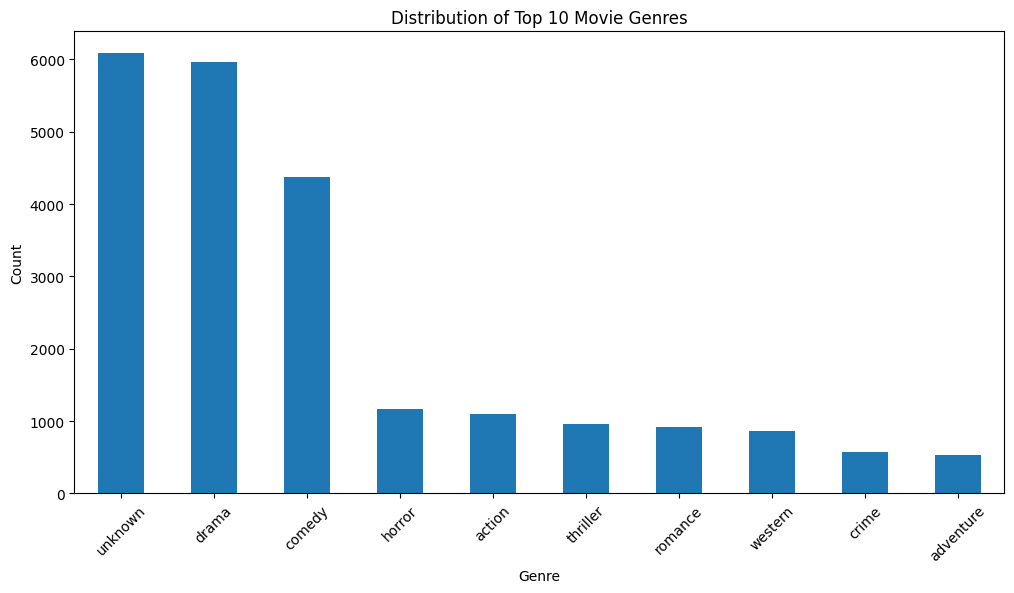

In [11]:
# Show only the top 10 most frequent genres
top_n = 10
top_genres = df1['Genre'].value_counts().nlargest(top_n)

plt.figure(figsize=(12, 6))
top_genres.plot(kind='bar')
plt.title(f'Distribution of Top {top_n} Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

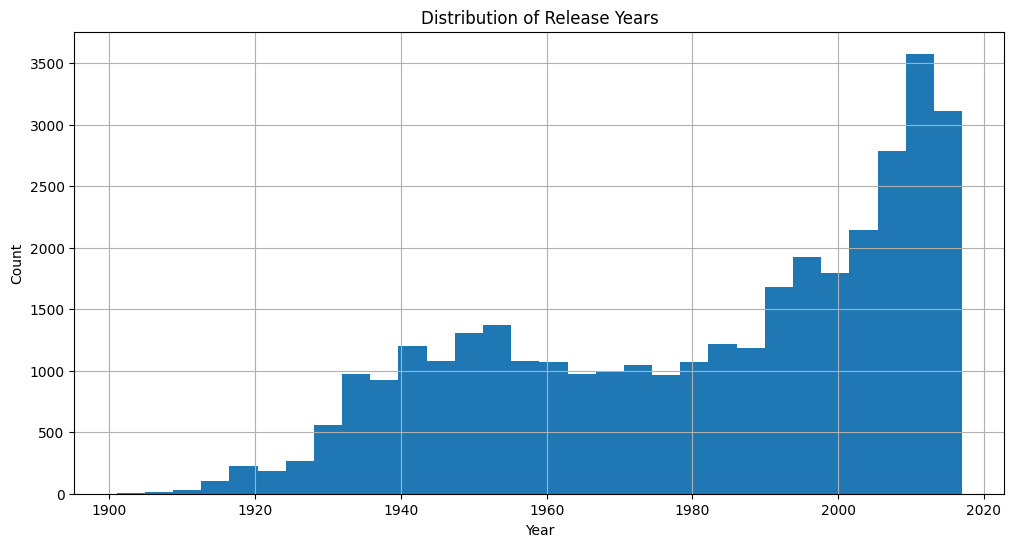

In [12]:

# Distribution of release years
plt.figure(figsize=(12, 6))
df1['Release Year'].hist(bins=30)
plt.title('Distribution of Release Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


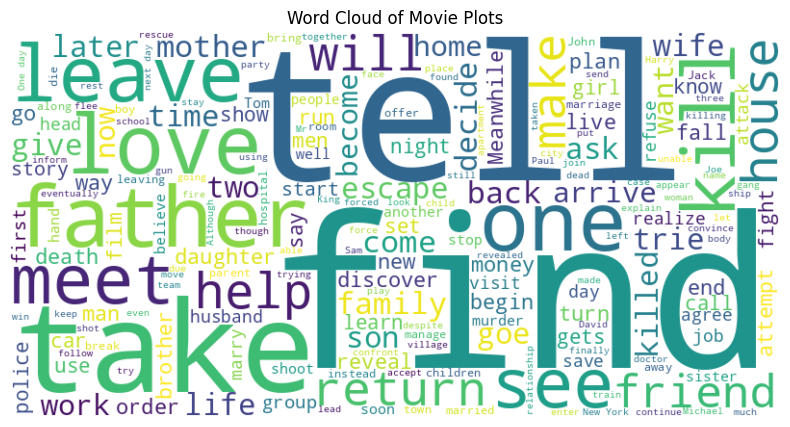

In [13]:

# Word cloud of the plot summaries (requires wordcloud package)
from wordcloud import WordCloud

plot_text = ' '.join(df1['Plot'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(plot_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Plots')
plt.show()

## 4. Text Preprocessing

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove punctuation and stop words
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    # Lemmatize the words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply text preprocessing
df1['Cleaned_Plot'] = df1['Plot'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 5. Feature Engineering

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df1['Cleaned_Plot'])

# Convert the TF-IDF features to a DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Combine TF-IDF features with other relevant features (if needed)
df_final = pd.concat([df1[['Release Year']], tfidf_df], axis=1)

# Convert categorical features like 'Origin/Ethnicity' to numeric using one-hot encoding
df_final = pd.concat([df_final, pd.get_dummies(df1['Origin/Ethnicity'], prefix='Origin')], axis=1)


## 6. Model Building

In [16]:

# Prepare the target variable and features
X = X_tfidf
y = df1['Genre']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("Multinomial Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))


Multinomial Naive Bayes Accuracy: 0.34537116652335914


## 7. Model Evaluation

In [17]:
# Evaluation for Multinomial Naive Bayes
print("Multinomial Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Multinomial Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))



Multinomial Naive Bayes Accuracy: 0.34537116652335914
Multinomial Naive Bayes Classification Report:
                                                                      precision    recall  f1-score   support

                                                                           0.00      0.00      0.00         2
                                                              action       0.29      0.05      0.08       221
                                                             action        0.00      0.00      0.00         2
                                                        action - war       0.00      0.00      0.00         1
                                                  action / adventure       0.00      0.00      0.00         1
                                         action / adventure / comedy       0.00      0.00      0.00         1
                                   action / adventure / martial arts       0.00      0.00      0.00         1
                  

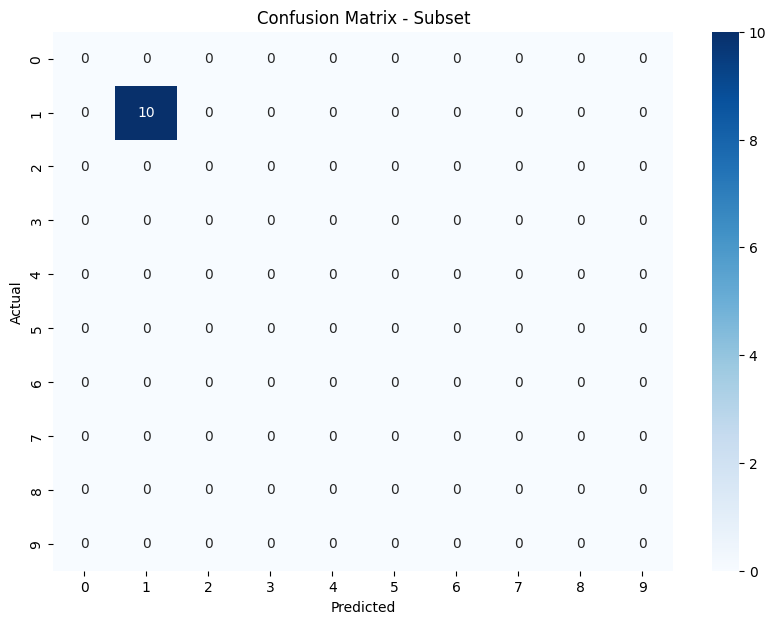

In [18]:
from sklearn.metrics import confusion_matrix
# Confusion Matrix for Naive Bayes

cm = confusion_matrix(y_test, y_pred_nb)
num_classes_to_plot = 10
cm_subset = cm[:num_classes_to_plot, :num_classes_to_plot]

# Plot the confusion matrix
plt.figure(figsize=(10, 7))  # Adjust figure size as needed
sns.heatmap(cm_subset, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(num_classes_to_plot), yticklabels=np.arange(num_classes_to_plot))
plt.title('Confusion Matrix - Subset')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [19]:
# Use the model to predict the genre of a new movie plot
new_plot = "The Venus Model"
new_plot_tfidf = tfidf.transform([new_plot])
predicted_genre = nb_model.predict(new_plot_tfidf)
print("Predicted Genre:", predicted_genre[0])

Predicted Genre: drama


In [20]:
# Use the model to predict the genre of a new movie plot
new_plot = "The Other Side of the Door"
new_plot_tfidf = tfidf.transform([new_plot])
predicted_genre = nb_model.predict(new_plot_tfidf)
print("Predicted Genre:", predicted_genre[0])

Predicted Genre: drama


In [21]:
# Use the model to predict the genre of a new movie plot
new_plot = "A romantic comedy about two individuals who fall in love while navigating their careers in a bustling city."
new_plot_tfidf = tfidf.transform([new_plot])
predicted_genre = nb_model.predict(new_plot_tfidf)
print("Predicted Genre:", predicted_genre[0])

Predicted Genre: comedy


In [22]:

new_plot = "Dead Daughters"
new_plot_tfidf = tfidf.transform([new_plot])
predicted_genre = nb_model.predict(new_plot_tfidf)
print("Predicted Genre:", predicted_genre[0])

Predicted Genre: unknown
